# 02ProvinceCOVID19-V3

# Libraries

In [61]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Load Data

In [62]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

In [63]:
province["date"] = province["date"].astype("datetime64[ns]")

In [64]:
province = province.drop(["time", "released", "deceased"], axis=1)

In [65]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

In [66]:
province.head()

,Date,Province,Confirmed
0,2020-01-20,Seoul,0
1,2020-01-20,Busan,0
2,2020-01-20,Daegu,0
3,2020-01-20,Incheon,1
4,2020-01-20,Gwangju,0


# Confirmed Cases by Province

In [67]:
population_size = {
    "Population": pd.Series(
        [
            3468139,
            2640441,
            9975709,
            13511676,
            2938457,
            2176636,
            3333056,
            1545717,
            1632088,
            1521763,
            1138225,
            353933,
            1526000,
            1797031,
            1788807,
            670858,
            2184528,
        ],
        index=[
            "Busan",
            "Gyeongsangbuk-do",
            "Seoul",
            "Gyeonggi-do",
            "Incheon",
            "Chungcheongnam-do",
            "Gyeongsangnam-do",
            "Daejeon",
            "Chungcheongbuk-do",
            "Gangwon-do",
            "Ulsan",
            "Sejong",
            "Gwangju",
            "Jeollabuk-do",
            "Jeollanam-do",
            "Jeju-do",
            "Daegu"           
        ],
    )
}

population_size = pd.DataFrame(population_size)
population_size.index.names = ['Province']

In [71]:
province_all = (
    province[["Province", "Confirmed"]].groupby(["Province"]).max()
)

In [74]:
df_inner = pd.merge(province_all, population_size, on='Province', how='inner')
df_inner = df_inner [["Population", "Confirmed"]]
df_inner = df_inner.reset_index()

<Figure size 1440x720 with 0 Axes>

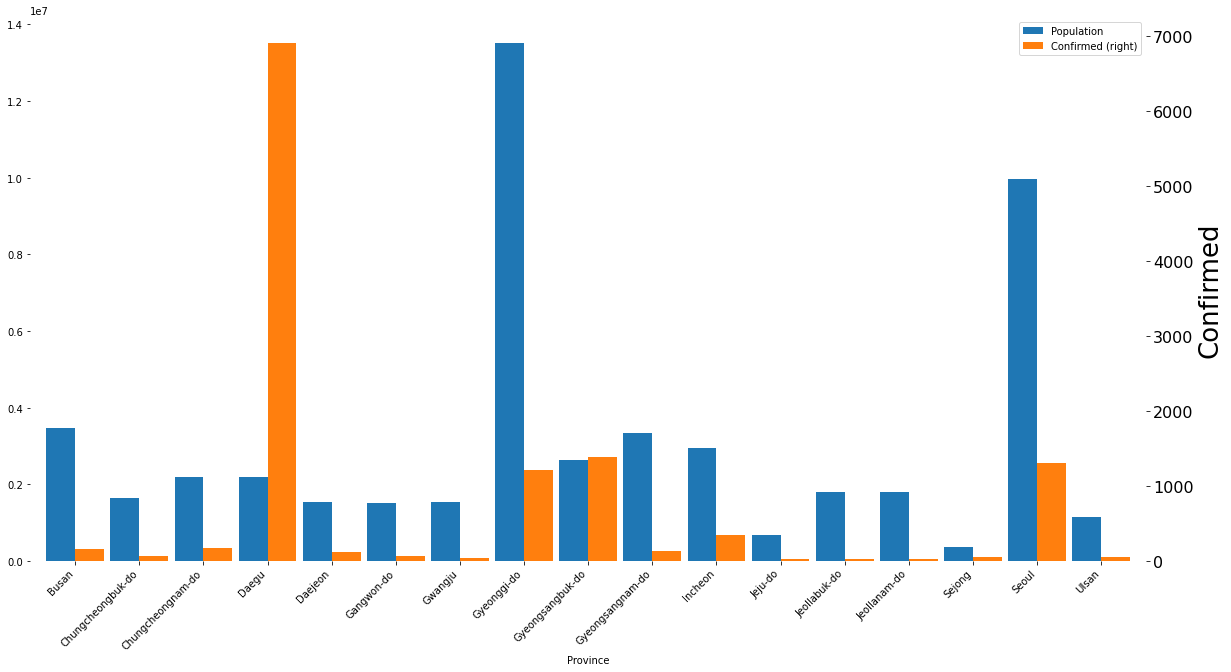

In [80]:
fig = plt.figure(figsize=(20,10))

chart = df_inner.plot(kind='bar', x = "Province", secondary_y= 'Confirmed' , figsize=(20,10), width=0.90)


plt.ylabel("Population", fontsize=16)
plt.ylabel("Confirmed", fontsize=26)
plt.xlabel("Province", fontsize=16)

plt.xticks(fontsize=40)
plt.yticks(fontsize=16)
sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();